In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

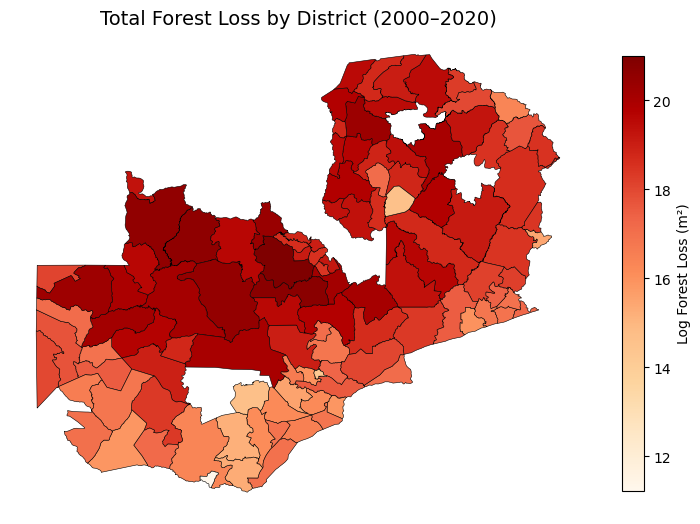

In [3]:
# Step 1: Load and clean shapefile
districts_gdf = gpd.read_file('Data/district.shp')
districts_gdf['district'] = districts_gdf['NAME_2'].str.strip()

# Apply merge_map to shapefile too
#districts_gdf['district'] = districts_gdf['district'].replace(merge_map)

# Step 2: Load and clean forest loss data
forest_df = pd.read_csv('Data/district_forest_cover.csv')
forest_df['district'] = forest_df['district'].str.strip()

# Step 3: Standardize names before merge_map is applied
name_fixes = {
    'Kapiri-Mposhi': 'Kapiri Mposhi',
    'Chienge': 'Chiengi',
    'Milenge': 'Milengi',
    "Shiwamg'andu": "Shiwang'andu"  # 🔧 CRUCIAL FIX
}
forest_df['district'] = forest_df['district'].replace(name_fixes)
districts_gdf['district'] = districts_gdf['district'].replace(name_fixes)

# Step 4: Merge newer districts into parent districts
merge_map = {
    'Chisamba': 'Chibombo',
    'Chitambo': 'Serenje',
    'Itezhi-tezhi': 'Namwala',
    'Kapiri Mposhi': 'Kabwe',
    'Luano': 'Mkushi',
    'Ngabwe': 'Kapiri Mposhi',
    'Chasefu': 'Lundazi',
    'Chipangali': 'Chipata',
    'Kasenengwa': 'Chipata',
    'Lumezi': 'Lundazi',
    'Sinda': 'Katete',
    'Vubwi': 'Chadiza',
    'Chembe': 'Milenge',
    'Chiengi': 'Nchelenge',
    'Chifunabuli': 'Samfya',
    'Chipili': 'Mwense',
    'Lunga': 'Samfya',
    'Milengi': 'Mansa',
    'Mwansabombwe': 'Mwense',
    'Chilanga': 'Kafue',
    'Chirundu': 'Siavonga',
    'Rufunsa': 'Chongwe',
    'Shibuyunji': 'Mumbwa',
    'Kanchibiya': 'Mpika',
    'Lavushimanda': 'Mpika',
    'Mafinga': 'Isoka',
    "Shiwang'andu": 'Chinsali',
    'Ikelenge': 'Mwinilunga',
    'Kalumbila': 'Solwezi',
    'Manyinga': 'Kabompo',
    'Mushindano': 'Solwezi',
    'Lunte District': 'Mporokoso',
    'Lupososhi': 'Luwingu',
    'Nsama': 'Kaputa',
    'Senga Hill': 'Mbala',
    'Chikankanta': 'Choma',
    'Pemba': 'Choma',
    'Zimba': 'Kalomo',
    'Limulunga': 'Mongu',
    'Luampa': 'Kaoma',
    'Mitete': 'Lukulu',
    'Mulobezi': 'Sesheke',
    'Mwandi': 'Sesheke',
    'Nalolo': 'Senanga',
    'Nkeyema': 'Kaoma',
    "Shang'ombo": 'Senanga',
    'Sikongo': 'Kalabo',
    'Sioma': "Shang'ombo"
}

# Apply merge map to both datasets
#forest_df['district'] = forest_df['district'].replace(merge_map)
#districts_gdf['district'] = districts_gdf['district'].replace(merge_map)

# Step 5: Group forest loss data and dissolve shapefile
mean_loss = forest_df.groupby('district', as_index=False)['loss_m2'].sum()
districts_gdf = districts_gdf.dissolve(by='district', as_index=False)

# Step 6: Merge data and plot
districts_merged = districts_gdf.merge(mean_loss, on='district', how='left')

# Plot
plot_df = districts_merged[~districts_merged['loss_m2'].isna()].copy()
plot_df['log_loss'] = np.log1p(plot_df['loss_m2'])

fig, ax = plt.subplots(figsize=(7.5, 9))
plot_df.plot(
    column='log_loss',
    cmap='OrRd',
    linewidth=0.4,
    edgecolor='black',
    legend=True,
    ax=ax,
    legend_kwds={'label': 'Log Forest Loss (m²)', 'shrink': 0.5}
)

ax.set_title('Total Forest Loss by District (2000–2020)', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

## Forest loss choropleth map

<Figure size 2000x1600 with 0 Axes>

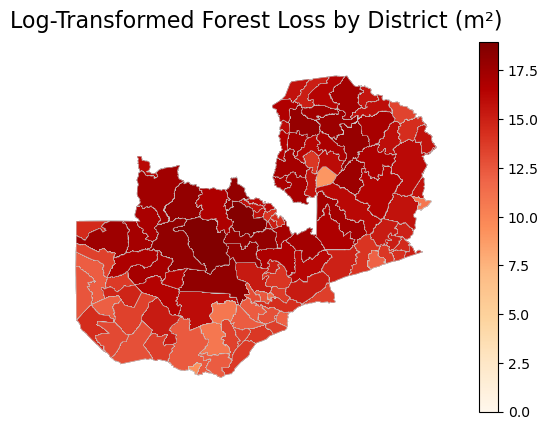

In [18]:
# load shapefile
gdf = gpd.read_file('Data/district.shp')

# load forest loss data
loss_df = pd.read_csv('Data/district_forest_cover.csv')

# log transform forest loss m2
loss_df['log_loss_m2'] = np.log1p(loss_df['loss_m2'])

# standardize district names for merging
gdf['district'] = gdf['NAME_2'].str.strip()

# fix district names
name_fixes = {
    "Itezhi-Tezhi": "Itezhi-tezhi",
    "Shangombo": "Shang'ombo",
    "Shiwang'Andu": "Shiwamg'andu",
    "Lunte": "Lunte District"
}

loss_df['district'] = loss_df['district'].replace(name_fixes)

# merge shapefile with loss data
merged = gdf.merge(loss_df, on='district', how='left')

# plot choropleth
plt.figure(figsize=(20, 16))
merged.plot(column='log_loss_m2', cmap='OrRd', linewidth=0.3, edgecolor='0.8', legend=True)
plt.title('Log-Transformed Forest Loss by District (m²)', fontsize=16, pad=24)
plt.axis('off')
plt.show()

In [10]:
print("Shapefile districts:")
print(sorted(gdf['district'].unique()))

print("\nForest loss data districts:")
print(sorted(loss_df['district'].unique()))

Shapefile districts:
['Chadiza', 'Chama', 'Chasefu', 'Chavuma', 'Chembe', 'Chibombo', 'Chiengi', 'Chifunabuli', 'Chikankanta', 'Chilanga', 'Chililabombwe', 'Chilubi', 'Chingola', 'Chinsali', 'Chipangali', 'Chipata', 'Chipili', 'Chirundu', 'Chisamba', 'Chitambo', 'Choma', 'Chongwe', 'Gwembe', 'Ikelenge', 'Isoka', 'Itezhi-tezhi', 'Kabompo', 'Kabwe', 'Kafue', 'Kalabo', 'Kalomo', 'Kalulushi', 'Kalumbila', 'Kanchibiya', 'Kaoma', 'Kapiri Mposhi', 'Kaputa', 'Kasama', 'Kasempa', 'Kasenengwa', 'Katete', 'Kawambwa', 'Kazungula', 'Kitwe', 'Lavushimanda', 'Limulunga', 'Livingstone', 'Luampa', 'Luangwa', 'Luano', 'Luanshya', 'Lufwanyama', 'Lukulu', 'Lumezi', 'Lundazi', 'Lunga', 'Lunte District', 'Lupososhi', 'Lusaka', 'Luwingu', 'Mafinga', 'Mambwe', 'Mansa', 'Manyinga', 'Masaiti', 'Mazabuka', 'Mbala', 'Milengi', 'Mitete', 'Mkushi', 'Mongu', 'Monze', 'Mpika', 'Mpongwe', 'Mporokoso', 'Mpulungu', 'Mufulira', 'Mufumbwe', 'Mulobezi', 'Mumbwa', 'Mungwi', 'Mushindano', 'Mwandi', 'Mwansabombwe', 'Mwense', 

In [5]:
# load shapefile
gdf = gpd.read_file('Data/district.shp')

# load forest loss data
loss_df = pd.read_csv('Data/district_forest_cover.csv')

loss_df.columns

Index(['district', 'year', 'forest_cover_ha', 'loss_m2', 'percent_loss_annual',
       'forest_2000_m2'],
      dtype='object')

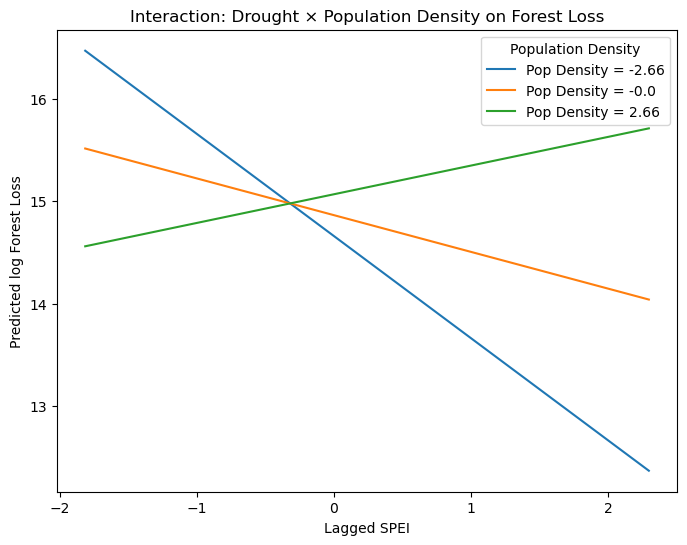

In [14]:
# load dataset
cleaned = pd.read_csv('regression_predictors.csv')

# log-transformed outcome
cleaned['log_loss_m2'] = np.log1p(cleaned['loss_m2'])

model_log = smf.ols(
    'log_loss_m2 ~ mean_spei_lag4 + pop_density_wi + spei4_x_popdens + percent_forest_2000 + C(district)',
    data=cleaned
).fit()

# create prediction grid
spei_range = np.linspace(cleaned['mean_spei_lag4'].min(), cleaned['mean_spei_lag4'].max(), 100)
mean = cleaned['pop_density_wi'].mean() 
std = cleaned['pop_density_wi'].std()
pop_density_levels = [mean - 2 * std, mean, mean + 2 * std]

percent_forest_mean = cleaned['percent_forest_2000'].mean()
district_example = cleaned['district'].mode()[0]

pred_df = pd.DataFrame([
    {
        'mean_spei_lag4': s,
        'pop_density_wi': p,
        'percent_forest_2000': percent_forest_mean,
        'district': district_example
    }
    for p in pop_density_levels
    for s in spei_range
])

pred_df['spei4_x_popdens'] = pred_df['mean_spei_lag4'] * pred_df['pop_density_wi']

# Predict from model
pred_df['predicted'] = model_log.predict(pred_df)

# Plot
plt.figure(figsize=(8, 6))
for p in pop_density_levels:
    subset = pred_df[pred_df['pop_density_wi'] == p]
    plt.plot(subset['mean_spei_lag4'], subset['predicted'], label=f'Pop Density = {round(p, 2)}')

plt.xlabel('Lagged SPEI')
plt.ylabel('Predicted log Forest Loss')
plt.legend(title='Population Density')
plt.title('Interaction: Drought × Population Density on Forest Loss')
plt.show()


In [6]:
cleaned.head()

,district,year,forest_cover_ha,loss_m2,percent_loss_annual,forest_2000_m2,population,pop_growth,district_area_km2,pop_density,...,mean_spei_lag1,mean_spei_lag2,mean_spei_lag3,mean_spei_lag4,mean_spei_lag5,pop_density_c,pop_density_c_scaled,pop_density_wi,spei4_x_popdens,log_loss_m2
0,Chadiza,2004,56773.795452,1.871819e+06,0.328614,5.723238e+08,66126.242188,0.018467,1518.283564,43.553289,...,0.227219,0.281255,0.364988,0.841021,NaN,-71.431376,-0.714314,-0.066837,-0.056211,14.442422
1,Chadiza,2005,56703.324923,7.047053e+05,0.124125,5.723238e+08,67476.906250,0.020426,1518.283564,44.442888,...,-0.079997,0.227219,0.281255,0.364988,0.841021,-70.541777,-0.705418,-0.057941,-0.021148,13.465536
2,Chadiza,2006,56388.063193,3.152617e+06,0.555985,5.723238e+08,68212.812500,0.010906,1518.283564,44.927584,...,-0.699067,-0.079997,0.227219,0.281255,0.364988,-70.057080,-0.700571,-0.053094,-0.014933,14.963744
3,Chadiza,2007,56253.107717,1.349555e+06,0.239333,5.723238e+08,68965.882812,0.011040,1518.283564,45.423585,...,0.170735,-0.699067,-0.079997,0.227219,0.281255,-69.561079,-0.695611,-0.048134,-0.010937,14.115286
4,Chadiza,2008,55860.402357,3.927054e+06,0.698104,5.723238e+08,71330.296875,0.034284,1518.283564,46.980879,...,0.760298,0.170735,-0.699067,-0.079997,0.227219,-68.003785,-0.680038,-0.032561,0.002605,15.183400


/tmp/ipykernel_2099670/959955947.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(summary_df['charcoal_quantile'], rotation=45)


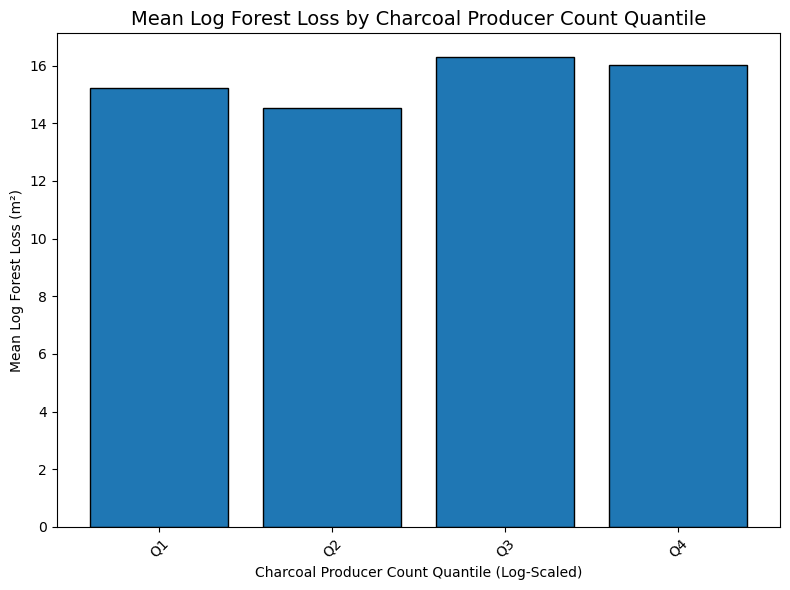

In [37]:
# load charcoal dataset
charcoal_df = pd.read_csv('charcoal_points.csv')

# prepare data for merge
cleaned['district'] = cleaned['district'].str.strip().str.title()
charcoal_df['district'] = charcoal_df['district'].str.strip().str.title()

# merge on matching districts
merged = cleaned.merge(charcoal_df, on='district', how='inner')

# aggregate charcoal count per district
charcoal_summary = merged.groupby('district', as_index=False)['charcoal'].sum()
charcoal_summary.rename(columns={'charcoal': 'charcoal_count'}, inplace=True)

# merge with cleaned dataframe
merged = merged.merge(charcoal_summary, on='district', how='left')

# apply log transform
merged['log_charcoal_count'] = np.log1p(merged['charcoal_count'])

# assign quantile groups
num_bins = min(4, merged['log_charcoal_count'].nunique())

if num_bins > 1:
    merged['charcoal_quantile'] = pd.qcut(
        merged['log_charcoal_count'],
        q=num_bins,
        labels=[f'Q{i+1}' for i in range(num_bins)]
    )
else:
    merged['charcoal_quantile'] = 'Single Group'

# summarize mean log forest loss
summary_df = merged.groupby('charcoal_quantile', observed=False)['log_loss_m2'].mean().reset_index()

# plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(summary_df['charcoal_quantile'].astype(str), summary_df['log_loss_m2'], edgecolor='black')

ax.set_title('Mean Log Forest Loss by Charcoal Producer Count Quantile', fontsize=14)
ax.set_xlabel('Charcoal Producer Count Quantile (Log-Scaled)')
ax.set_ylabel('Mean Log Forest Loss (m²)')
ax.set_xticklabels(summary_df['charcoal_quantile'], rotation=45)

plt.tight_layout()
plt.show()


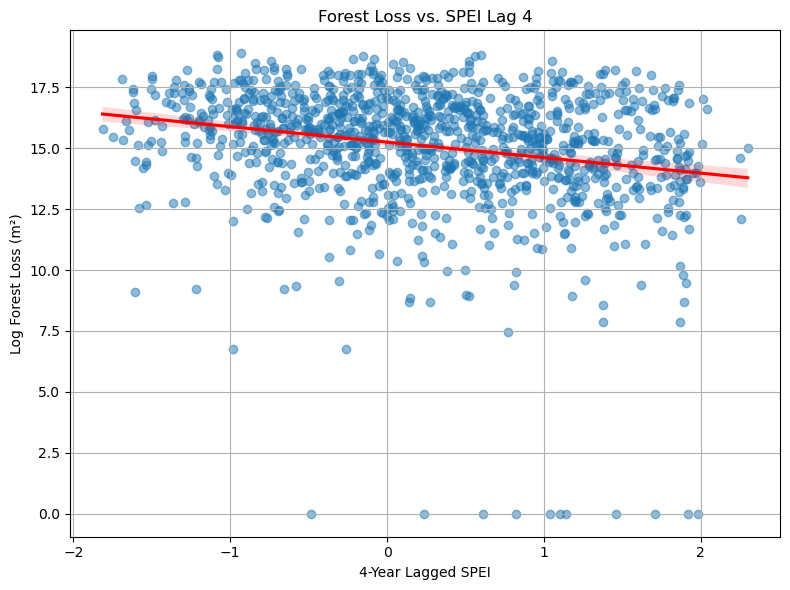

In [47]:
plt.figure(figsize=(8,6))
sns.regplot(data=cleaned, x='mean_spei_lag4', y='log_loss_m2', scatter_kws={'alpha': 0.5}, line_kws={'color':'red'})
plt.xlabel('4-Year Lagged SPEI')
plt.ylabel('Log Forest Loss (m²)')
plt.title('Forest Loss vs. SPEI Lag 4')
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
cleaned.head()

,district,year,forest_cover_ha,loss_m2,percent_loss_annual,forest_2000_m2,population,pop_growth,district_area_km2,pop_density,...,mean_spei_lag1,mean_spei_lag2,mean_spei_lag3,mean_spei_lag4,mean_spei_lag5,pop_density_c,pop_density_c_scaled,pop_density_wi,spei4_x_popdens,log_loss_m2
0,Chadiza,2004,56773.795452,1.871819e+06,0.328614,5.723238e+08,66126.242188,0.018467,1518.283564,43.553289,...,0.227219,0.281255,0.364988,0.841021,NaN,-71.431376,-0.714314,-0.066837,-0.056211,14.442422
1,Chadiza,2005,56703.324923,7.047053e+05,0.124125,5.723238e+08,67476.906250,0.020426,1518.283564,44.442888,...,-0.079997,0.227219,0.281255,0.364988,0.841021,-70.541777,-0.705418,-0.057941,-0.021148,13.465536
2,Chadiza,2006,56388.063193,3.152617e+06,0.555985,5.723238e+08,68212.812500,0.010906,1518.283564,44.927584,...,-0.699067,-0.079997,0.227219,0.281255,0.364988,-70.057080,-0.700571,-0.053094,-0.014933,14.963744
3,Chadiza,2007,56253.107717,1.349555e+06,0.239333,5.723238e+08,68965.882812,0.011040,1518.283564,45.423585,...,0.170735,-0.699067,-0.079997,0.227219,0.281255,-69.561079,-0.695611,-0.048134,-0.010937,14.115286
4,Chadiza,2008,55860.402357,3.927054e+06,0.698104,5.723238e+08,71330.296875,0.034284,1518.283564,46.980879,...,0.760298,0.170735,-0.699067,-0.079997,0.227219,-68.003785,-0.680038,-0.032561,0.002605,15.183400
